<a href="https://colab.research.google.com/github/piyushyadav2233/pca.assisgnment-/blob/main/anime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [212]:
df=pd.read_csv('/content/anime.csv')
df

anime_id                                               name  \
0         32281                                     Kimi no Na wa.   
1          5114                   Fullmetal Alchemist: Brotherhood   
2         28977                                           Gintama°   
3          9253                                        Steins;Gate   
4          9969                                      Gintama&#039;   
...         ...                                                ...   
12289      9316       Toushindai My Lover: Minami tai Mecha-Minami   
12290      5543                                        Under World   
12291      5621                     Violence Gekiga David no Hoshi   
12292      6133  Violence Gekiga Shin David no Hoshi: Inma Dens...   
12293     26081                   Yasuji no Pornorama: Yacchimae!!   

                                                   genre   type episodes  \
0                   Drama, Romance, School, Supernatural  Movie        1   
1      Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64   
2      Action, Comedy, Historical, Parody, Samurai, S...     TV       51   
3                                       Sci-Fi, Thriller     TV       24   
4      Action, Comedy, Historical, Parody, Samurai, S...     TV       51   
...                                                  ...    ...      ...   
12289                                             Hentai    OVA        1   
12290                                             Hentai    OVA        1   
12291                                             Hentai    OVA        4   
12292                                             Hentai    OVA        1   
12293                                             Hentai  Movie        1   

       rating  members  
0        9.37   200630  
1        9.26   793665  
2        9.25   114262  
3        9.17   673572  
4        9.16   151266  
...       ...      ...  
12289    4.15      211  
12290    4.28      183  
12291    4.88      219  
12292    4.98      175  
12293    5.46      142  

[12294 rows x 7 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [ ]:
df.head(10)

anime_id                                               name  \
0     32281                                     Kimi no Na wa.   
1      5114                   Fullmetal Alchemist: Brotherhood   
2     28977                                           Gintama°   
3      9253                                        Steins;Gate   
4      9969                                      Gintama&#039;   
5     32935  Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...   
6     11061                             Hunter x Hunter (2011)   
7       820                               Ginga Eiyuu Densetsu   
8     15335  Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...   
9     15417                           Gintama&#039;: Enchousen   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   
5             Comedy, Drama, School, Shounen, Sports     TV       10    9.15   
6            Action, Adventure, Shounen, Super Power     TV      148    9.13   
7                     Drama, Military, Sci-Fi, Space    OVA      110    9.11   
8  Action, Comedy, Historical, Parody, Samurai, S...  Movie        1    9.10   
9  Action, Comedy, Historical, Parody, Samurai, S...     TV       13    9.11   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  
5    93351  
6   425855  
7    80679  
8    72534  
9    81109

In [ ]:
df.tail(10)

anime_id                                               name  \
12284     26031                                 Super Erotic Anime   
12285     34399                                   Taimanin Asagi 3   
12286     10368                                Teleclub no Himitsu   
12287      9352                             Tenshi no Habataki Jun   
12288      5541                                   The Satisfaction   
12289      9316       Toushindai My Lover: Minami tai Mecha-Minami   
12290      5543                                        Under World   
12291      5621                     Violence Gekiga David no Hoshi   
12292      6133  Violence Gekiga Shin David no Hoshi: Inma Dens...   
12293     26081                   Yasuji no Pornorama: Yacchimae!!   

                              genre   type episodes  rating  members  
12284                        Hentai    OVA        2    4.45      118  
12285  Demons, Hentai, Supernatural    OVA  Unknown     NaN      485  
12286                        Hentai    OVA        2    4.67      148  
12287                        Hentai    OVA        1    4.33      201  
12288                        Hentai    OVA        1    4.37      166  
12289                        Hentai    OVA        1    4.15      211  
12290                        Hentai    OVA        1    4.28      183  
12291                        Hentai    OVA        4    4.88      219  
12292                        Hentai    OVA        1    4.98      175  
12293                        Hentai  Movie        1    5.46      142

In [ ]:
df.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [ ]:
df.describe(include='all')

anime_id                     name   genre   type episodes  \
count   12294.000000                    12294   12232  12269    12294   
unique           NaN                    12292    3264      6      187   
top              NaN  Shi Wan Ge Leng Xiaohua  Hentai     TV        1   
freq             NaN                        2     823   3787     5677   
mean    14058.221653                      NaN     NaN    NaN      NaN   
std     11455.294701                      NaN     NaN    NaN      NaN   
min         1.000000                      NaN     NaN    NaN      NaN   
25%      3484.250000                      NaN     NaN    NaN      NaN   
50%     10260.500000                      NaN     NaN    NaN      NaN   
75%     24794.500000                      NaN     NaN    NaN      NaN   
max     34527.000000                      NaN     NaN    NaN      NaN   

              rating       members  
count   12064.000000  1.229400e+04  
unique           NaN           NaN  
top              NaN           NaN  
freq             NaN           NaN  
mean        6.473902  1.807134e+04  
std         1.026746  5.482068e+04  
min         1.670000  5.000000e+00  
25%         5.880000  2.250000e+02  
50%         6.570000  1.550000e+03  
75%         7.180000  9.437000e+03  
max        10.000000  1.013917e+06

In [ ]:
# For this project, you might choose to use the anime genres and user ratings as
# features for computing similarity. %%
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [ ]:
df.duplicated().sum()

0

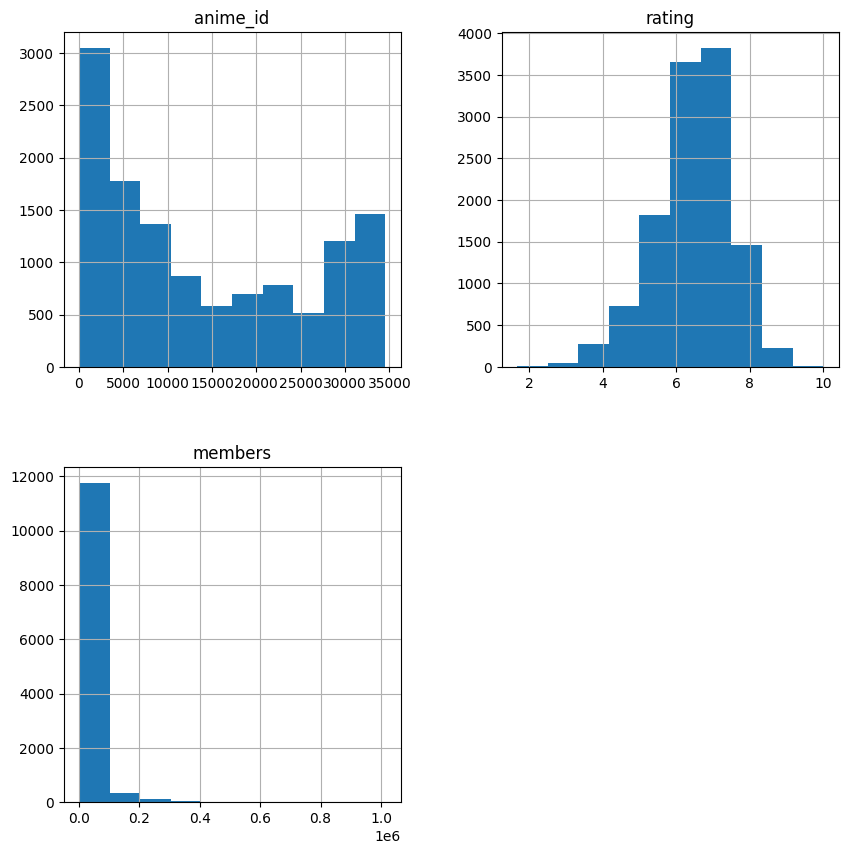

In [ ]:
df.hist(figsize=(10,10))
plt.show()

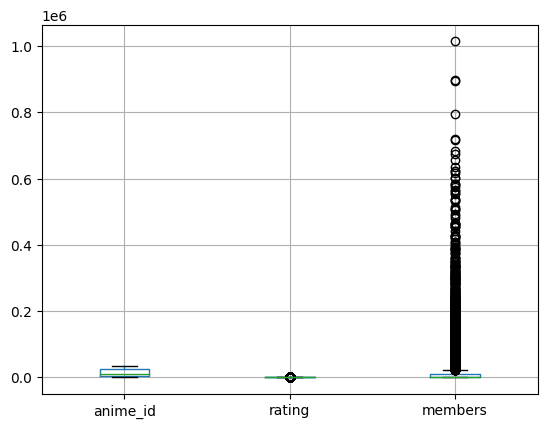

In [ ]:
df.boxplot()
plt.show()

In [ ]:
 #Import the necessary modules.
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix



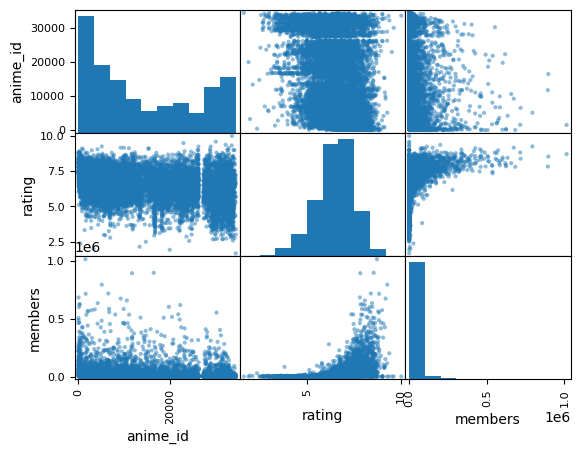

In [ ]:
# Generate the scatter matrix.
scatter_matrix(df)

# Display the plot.
plt.show()


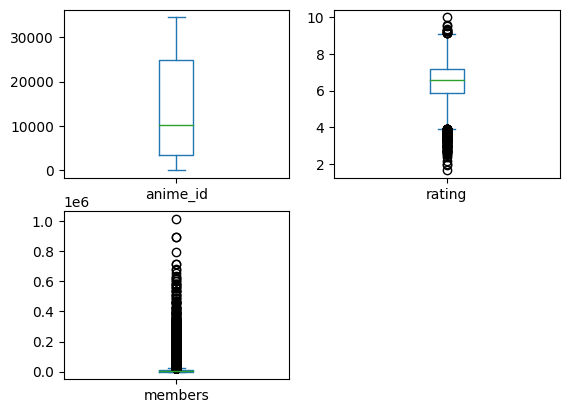

In [ ]:
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

In [ ]:
df.anime_id.value_counts()

anime_id
32281    1
30404    1
26013    1
26017    1
15787    1
        ..
12455    1
28789    1
373      1
2089     1
26081    1
Name: count, Length: 12294, dtype: int64

In [ ]:
df.anime_id.value_counts().sum()

12294

<Axes: xlabel='anime_id'>

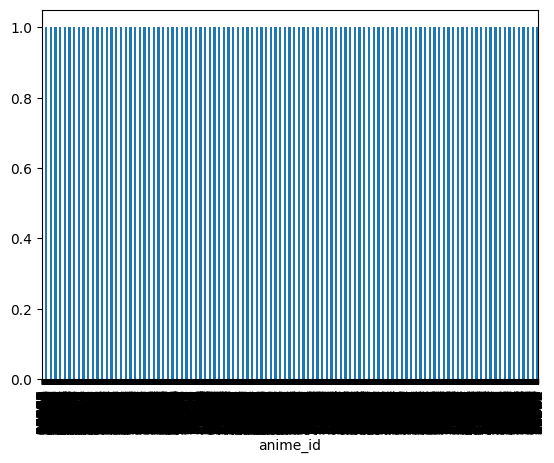

In [ ]:
df.anime_id.value_counts().plot(kind='bar')

In [ ]:
df.rating.value_counts()


rating
6.00    141
7.00     99
6.50     90
6.25     84
5.00     76
       ... 
3.47      1
3.71      1
3.87      1
3.91      1
3.14      1
Name: count, Length: 598, dtype: int64

In [ ]:
df.select_dtypes(include=['number']).corr()


anime_id    rating   members
anime_id  1.000000 -0.284625 -0.080071
rating   -0.284625  1.000000  0.387979
members  -0.080071  0.387979  1.000000

<Axes: >

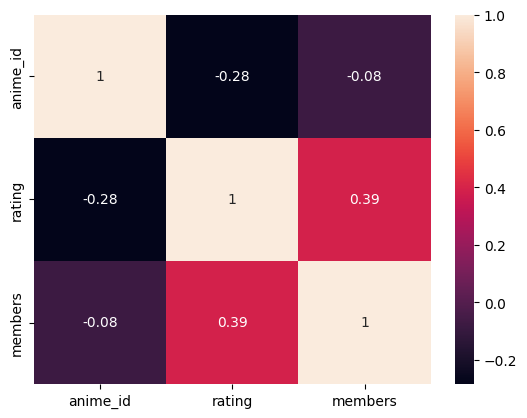

In [ ]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True)

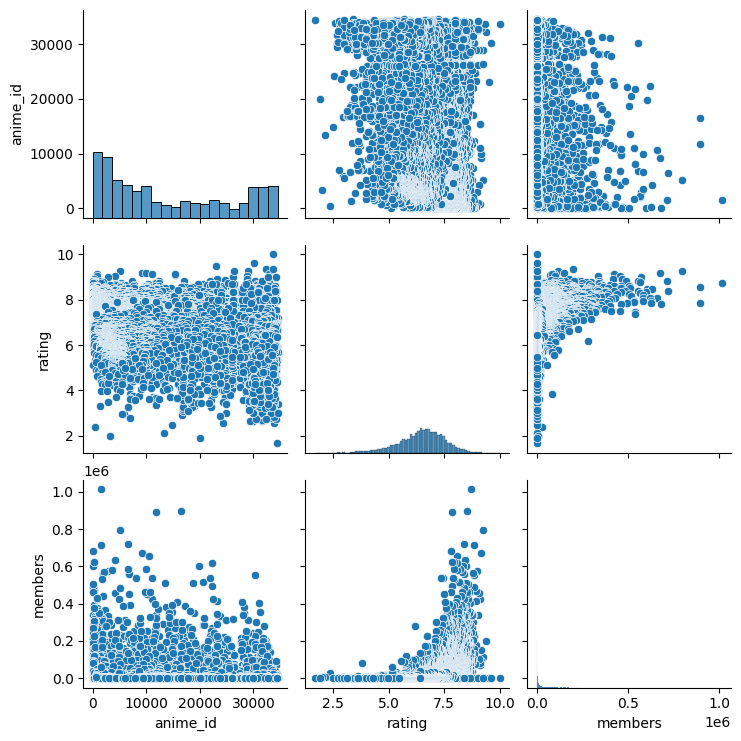

In [ ]:
sns.pairplot(df)

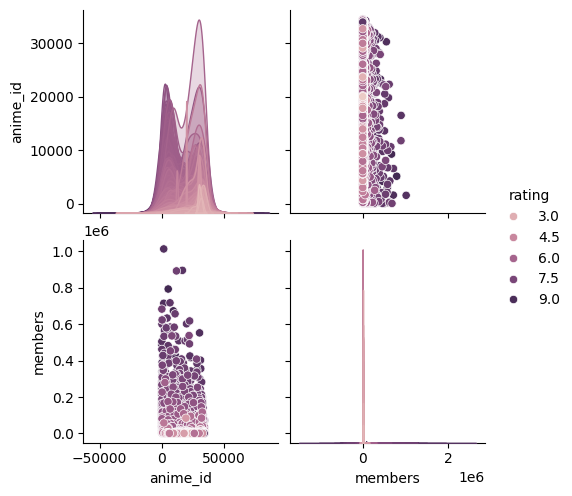

In [ ]:
sns.pairplot(df, hue='rating')

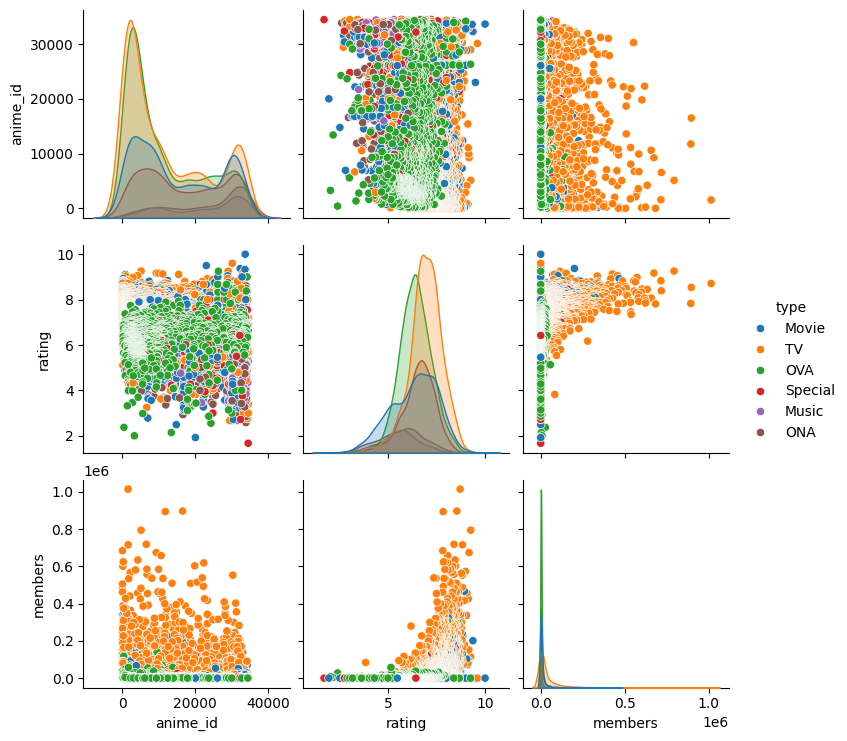

In [ ]:
sns.pairplot(df, hue='type')

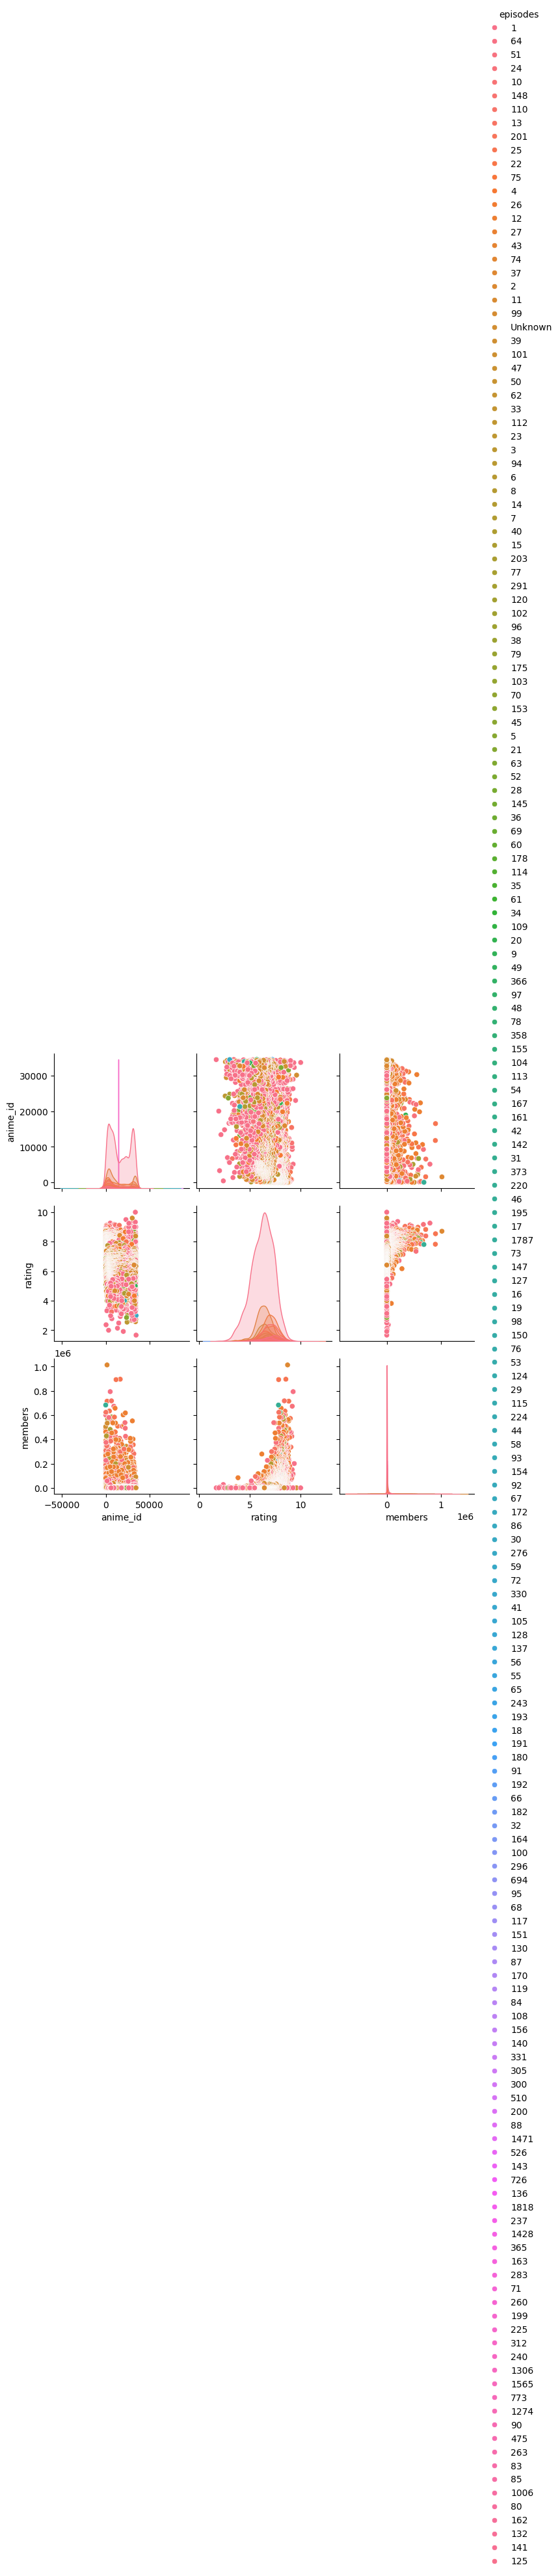

In [ ]:
sns.pairplot(df, hue='episodes')

In [ ]:
from sklearn.preprocessing import StandardScaler # Make sure to import the StandardScaler class

scaler = StandardScaler() # Use a different variable name like scaler
df_scaled = scaler.fit_transform(df.select_dtypes(include=['number'])) # Use new variable name
df_scaled

array([[ 1.59083812,  2.82077308,  3.33024137],
       [-0.78082543,  2.7136341 , 14.14840622],
       [ 1.30240081,  2.70389419,  1.75471335],
       ...,
       [-0.73656462, -1.55244557, -0.32566298],
       [-0.69186732, -1.45504649, -0.32646563],
       [ 1.04958167, -0.98753091, -0.32706762]])

In [ ]:
df.select_dtypes(include=['number']).quantile(0.99) # Select only numerical columns before applying quantile.


anime_id     34086.14
rating           8.50
members     276774.30
Name: 0.99, dtype: float64

<Axes: >

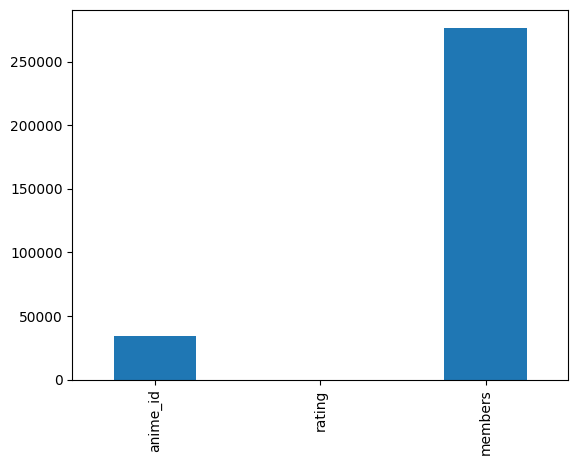

In [ ]:
df.select_dtypes(include=['number']).quantile(0.99).plot(kind='bar')

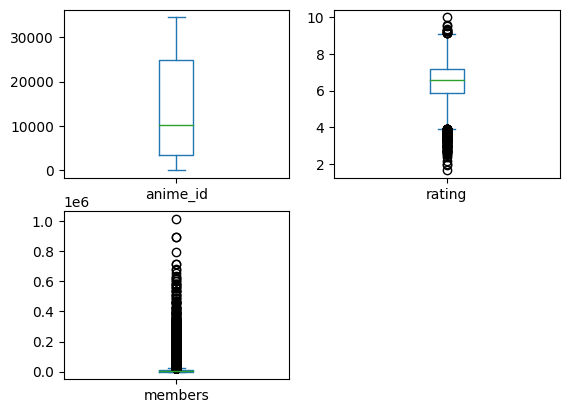

In [ ]:
ax=df[df.select_dtypes(include=['number']).columns].plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)

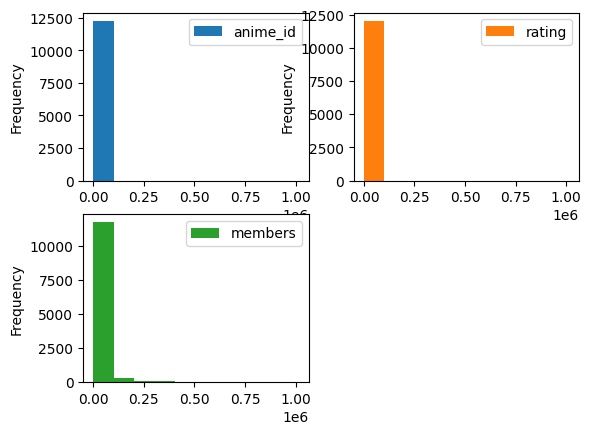

In [ ]:
ax=df[df.select_dtypes(include=['number']).columns].plot(kind='hist', subplots=True, layout=(2,2), sharex=False, sharey=False)

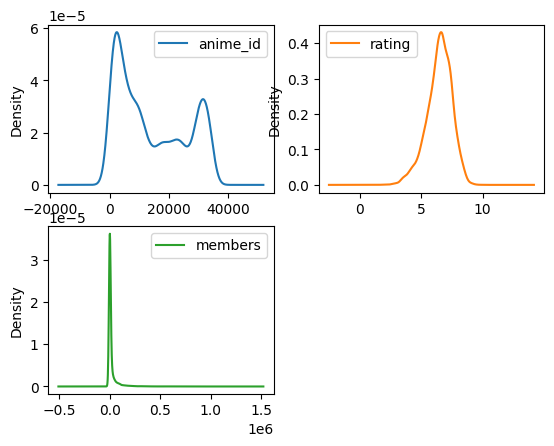

In [ ]:
ax=df[df.select_dtypes(include=['number']).columns].plot(kind='kde', subplots=True, layout=(2,2), sharex=False, sharey=False)

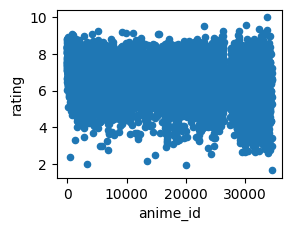

In [ ]:
ax=df[df.select_dtypes(include=['number']).columns].plot(kind='scatter', x='anime_id', y='rating', subplots=True, layout=(2,2), sharex=False, sharey=False)

In [ ]:
print(df.dtypes)


anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object


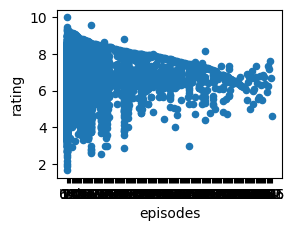

In [ ]:
ax = df.plot(kind='scatter', x='episodes', y='rating', subplots=True, layout=(2,2), sharex=False, sharey=False)


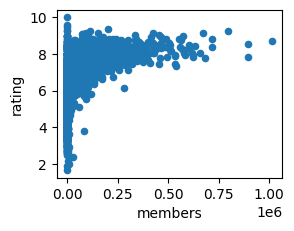

In [ ]:
ax=df.plot(kind='scatter', x='members', y='rating', subplots=True, layout=(2,2), sharex=False, sharey=False)

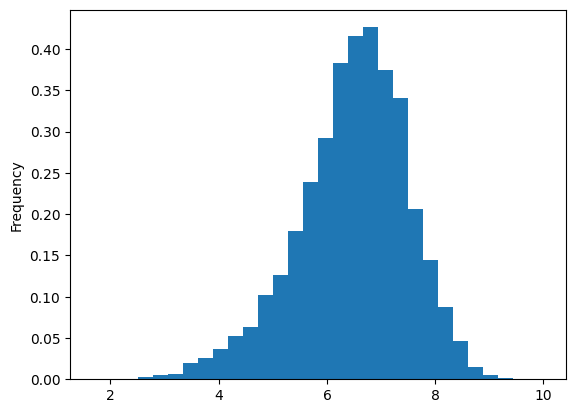

In [ ]:
ax=df['rating'].plot.hist(density=True, bins=30)


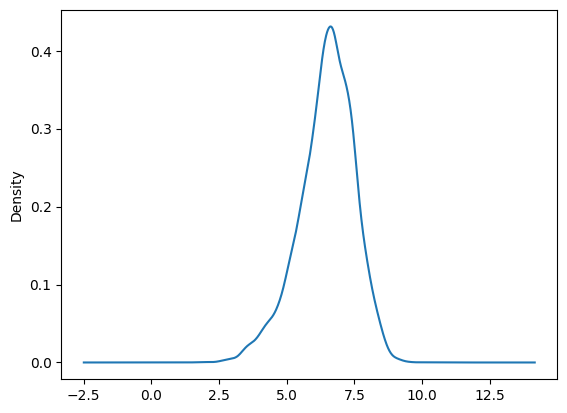

In [ ]:
ax=df['rating'].plot.kde()

In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None


In [ ]:
print(df.transpose().dtypes)


0        object
1        object
2        object
3        object
4        object
          ...  
12289    object
12290    object
12291    object
12292    object
12293    object
Length: 12294, dtype: object


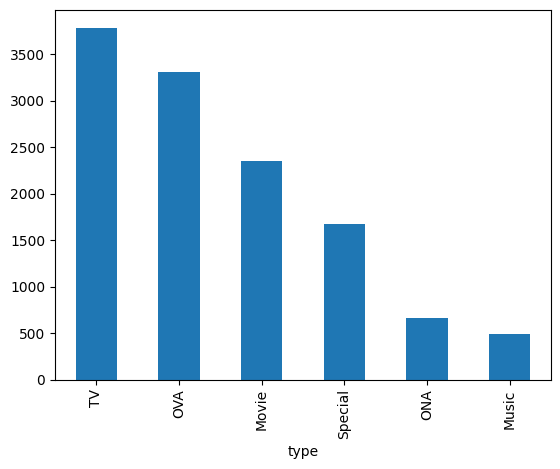

In [ ]:
ax=barchart=df['type'].value_counts().plot(kind='bar')

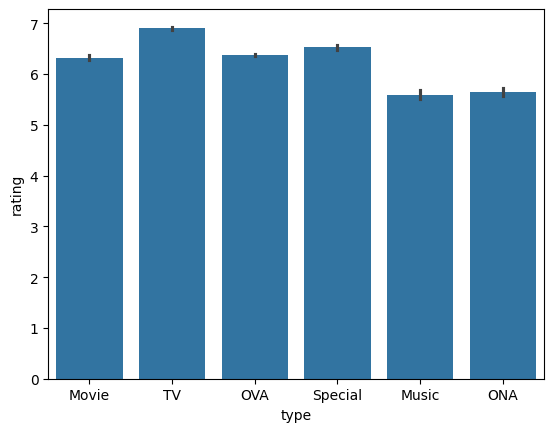

In [ ]:
ax=sns.barplot(x='type', y='rating', data=df)

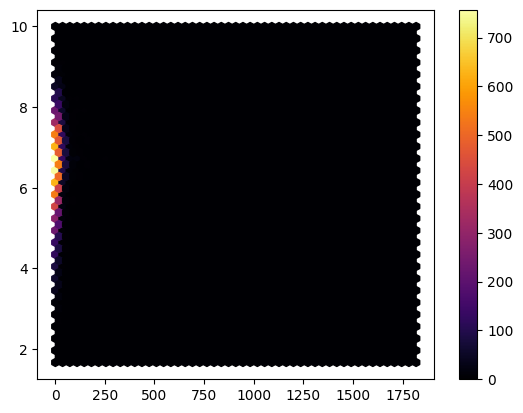

In [ ]:
df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce')
ax = plt.hexbin(df['episodes'], df['rating'], gridsize=50, cmap='inferno')
plt.colorbar(ax)



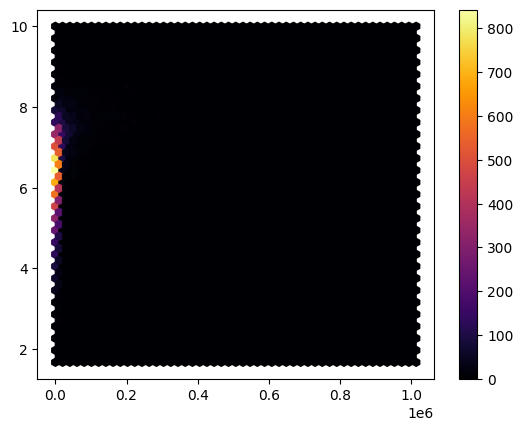

In [ ]:
df['members'] = pd.to_numeric(df['members'], errors='coerce')
ax = plt.hexbin(df['members'], df['rating'], gridsize=50, cmap='inferno')
plt.colorbar(ax)

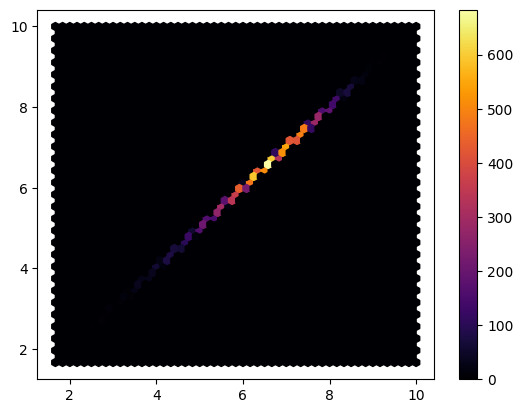

In [ ]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
ax = plt.hexbin(df['rating'], df['rating'], gridsize=50, cmap='inferno')
plt.colorbar(ax)

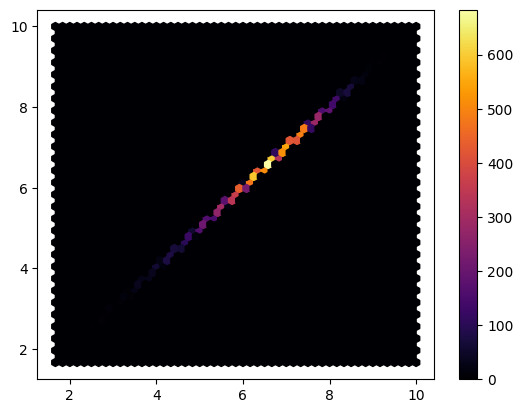

In [ ]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
ax = plt.hexbin(df['rating'], df['rating'], gridsize=50, cmap='inferno')
plt.colorbar(ax)

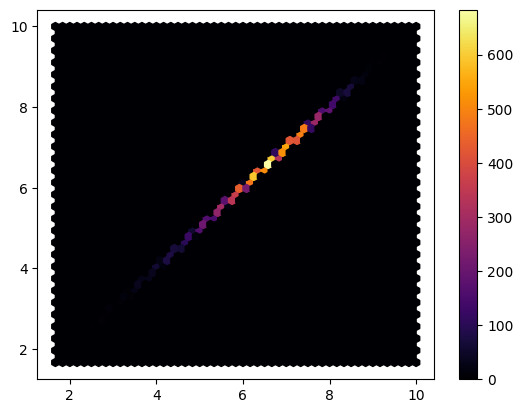

In [ ]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
ax = plt.hexbin(df['rating'], df['rating'], gridsize=50, cmap='inferno')
plt.colorbar(ax)

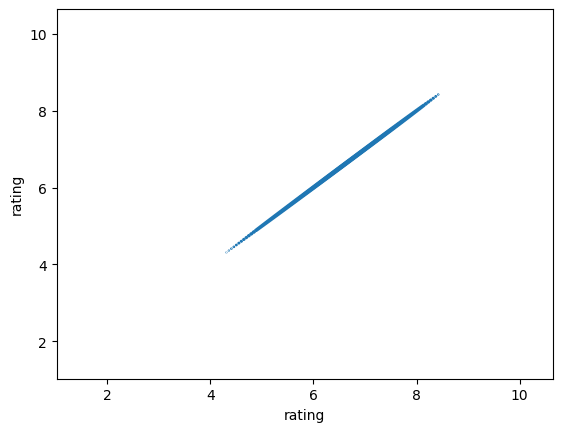

In [ ]:
ax=sns.kdeplot(data=df, x='rating', y='rating')

<ipython-input-51-c7c57811296a>:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  ax=sns.kdeplot(data=df, x='rating', y='rating', hue='type')
<ipython-input-51-c7c57811296a>:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  ax=sns.kdeplot(data=df, x='rating', y='rating', hue='type')
<ipython-input-51-c7c57811296a>:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  ax=sns.kdeplot(data=df, x='rating', y='rating', hue='type')
<ipython-input-51-c7c57811296a>:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  ax=sns.kdeplot(data=df, x='rating', y='rating', hue='type')


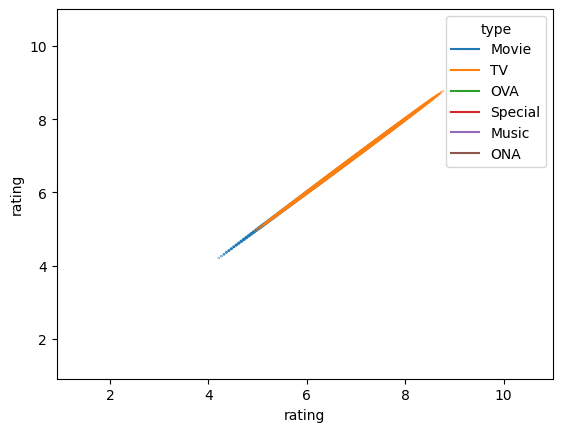

In [ ]:
ax=sns.kdeplot(data=df, x='rating', y='rating', hue='type')


<ipython-input-52-a0f69e672f1d>:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  ax=sns.kdeplot(data=df, x='rating', y='rating', hue='episodes')
<ipython-input-52-a0f69e672f1d>:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  ax=sns.kdeplot(data=df, x='rating', y='rating', hue='episodes')
<ipython-input-52-a0f69e672f1d>:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  ax=sns.kdeplot(data=df, x='rating', y='rating', hue='episodes')
<ipython-input-52-a0f69e672f1d>:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  ax=sns.kdeplot(data=df, x='rating', y='rating', hue='episodes')
<ipython-input-52-a0f69e672f1d>:1: UserWarning: KDE cannot be estimated (0 variance or perfect c

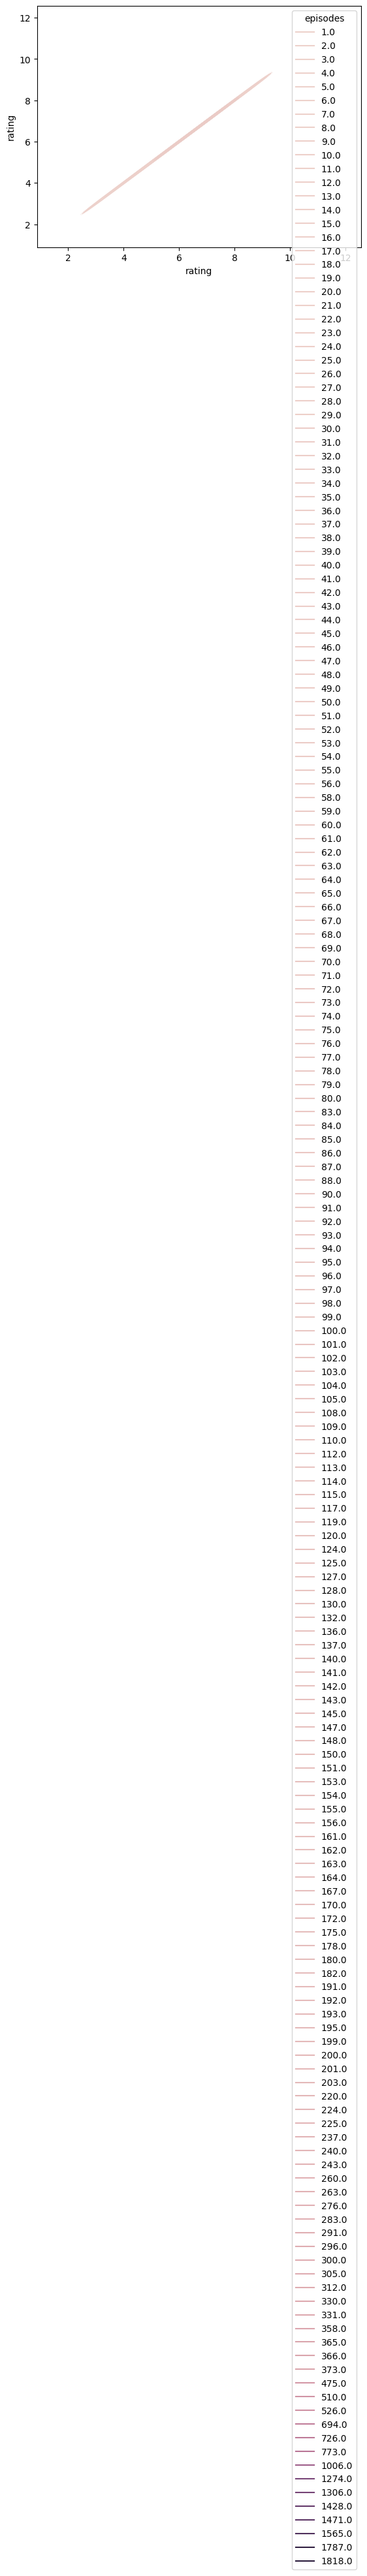

In [ ]:
ax=sns.kdeplot(data=df, x='rating', y='rating', hue='episodes')

In [ ]:
print(df.columns)


Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')


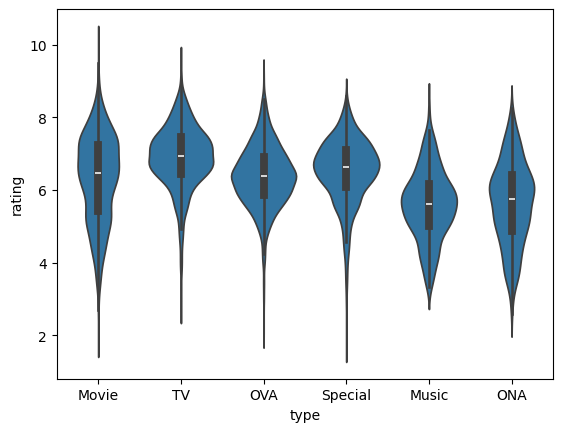

In [ ]:
ax = sns.violinplot(x='type', y='rating', data=df) # Then retry plotting


In [ ]:
#data samplin and distribution
df.describe()


anime_id      episodes        rating       members
count  12294.000000  11954.000000  12064.000000  1.229400e+04
mean   14058.221653     12.382550      6.473902  1.807134e+04
std    11455.294701     46.865352      1.026746  5.482068e+04
min        1.000000      1.000000      1.670000  5.000000e+00
25%     3484.250000      1.000000      5.880000  2.250000e+02
50%    10260.500000      2.000000      6.570000  1.550000e+03
75%    24794.500000     12.000000      7.180000  9.437000e+03
max    34527.000000   1818.000000     10.000000  1.013917e+06

<ipython-input-56-4a25aab48407>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(norm_sample, fit=stats.norm, ax=ax)


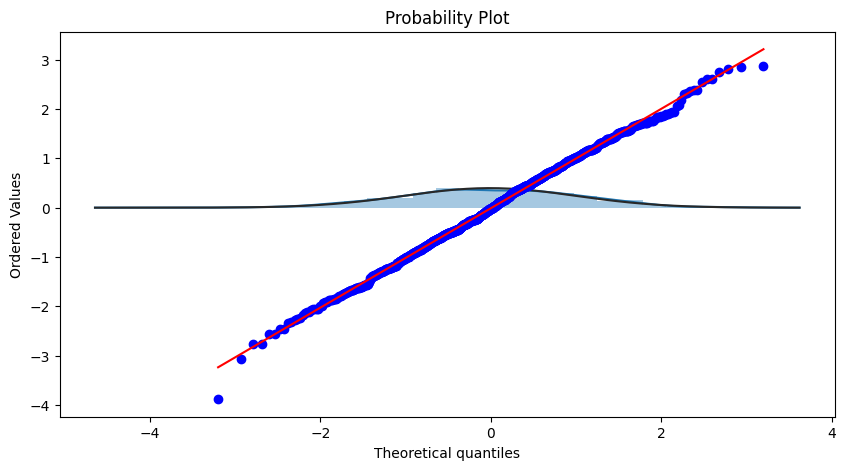

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Import the stats module from scipy
from scipy import stats

fig,ax=plt.subplots(figsize=(10,5))
norm_sample=stats.norm.rvs(size=1000)
sns.distplot(norm_sample, fit=stats.norm, ax=ax)
stats.probplot(norm_sample, plot=ax)
plt.show()

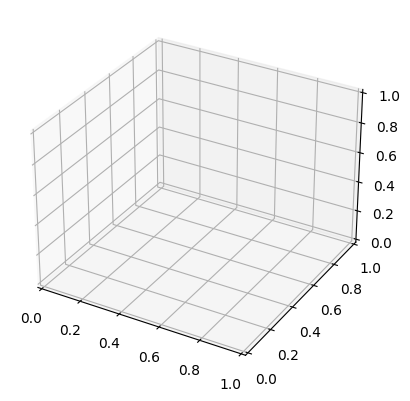

In [ ]:
#3d
fig=plt.figure()
ax=plt.axes(projection='3d')


In [ ]:
import plotly.express as px
fig=px.scatter_3d(df, x='anime_id', y='rating', z='members')
fig.show()

In [ ]:
fig=px.scatter_3d(df, x='anime_id', y='rating', z='members', color='type')
fig.show()

In [ ]:
#Feature scalling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df.select_dtypes(include=['number']))
df_scaled


array([[ 1.59083812, -0.24288788,  2.82077308,  3.33024137],
       [-0.78082543,  1.10144504,  2.7136341 , 14.14840622],
       [ 1.30240081,  0.82404301,  2.70389419,  1.75471335],
       ...,
       [-0.73656462, -0.17887203, -1.55244557, -0.32566298],
       [-0.69186732, -0.24288788, -1.45504649, -0.32646563],
       [ 1.04958167, -0.24288788, -0.98753091, -0.32706762]])

In [ ]:
df.head()

anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type  episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie       1.0    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV      64.0    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV      51.0    9.25   
3                                   Sci-Fi, Thriller     TV      24.0    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV      51.0    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266

In [ ]:
#slection bias
df.sample(10)

anime_id                                               name  \
8500       8179                                          Eagle Sam   
7861       7020                                            Fashion   
9988      31642                Pittanko! Taiyou-sensei to Pittanko   
6596       2607                                              Birth   
11131      6893                                         Oni Chichi   
6660      30133                               Ima, Futari no Michi   
3801      12963                                Jewelpet Kira☆Deco!   
11254      2866                                        Ane☆Haramix   
9704      24573                                     Neko to Nezumi   
12109     18481  Bishoujo Animerama: Gokkun Doll - Choujigen Pi...   

                                   genre     type  episodes  rating  members  
8500                      Comedy, Sports       TV      51.0    5.45      105  
7861                    Comedy, Dementia    Movie       1.0    4.83      251  
9988                Comedy, Kids, School  Special       1.0    6.25       34  
6596   Action, Adventure, Comedy, Sci-Fi      OVA       1.0    6.04     2129  
11131                             Hentai      OVA       2.0    7.47    23605  
6660                               Drama  Special       1.0    6.01      352  
3801              Fantasy, Magic, Shoujo       TV      52.0    6.88     1452  
11254                             Hentai      OVA       4.0    6.96     7712  
9704                              Comedy    Movie       1.0    5.57       72  
12109             Hentai, School, Sci-Fi      OVA       1.0    5.48      248

In [ ]:
#standard error
df.select_dtypes(include=['number']).std() # Select only numerical columns for std calculation


anime_id    11455.294701
episodes       46.865352
rating          1.026746
members     54820.676925
dtype: float64

In [ ]:
#bootstarp
df.sample(10, replace=True)

anime_id                                         name  \
1917        868                                Slayers Great   
3993      25859                                      Re-Kan!   
4363       1019                              Honoo no Mirage   
5625       6227                     Lovedol: Lovely Idol OVA   
1668        666                     JoJo no Kimyou na Bouken   
12257     34168  Hataraku Otona no Renai Jijou The Animation   
7484      30160                               Oppai ga Ippai   
7103       7524                                 Mahou no Pen   
7469       5304                                   Akiba-chan   
713       18153                            Kyoukai no Kanata   

                                                   genre   type  episodes  \
1917          Adventure, Comedy, Fantasy, Magic, Shounen  Movie       1.0   
3993                Comedy, School, Seinen, Supernatural     TV      13.0   
4363   Action, Drama, Historical, Romance, School, Sh...     TV      13.0   
5625                  Comedy, Drama, Ecchi, Harem, Music    OVA       1.0   
1668   Adventure, Drama, Fantasy, Horror, Shounen, Su...    OVA       6.0   
12257                                             Hentai    OVA       1.0   
7484                                         Kids, Music  Music       1.0   
7103                                          Historical  Movie       1.0   
7469                         Comedy, Kids, Slice of Life     TV      10.0   
713                 Fantasy, Slice of Life, Supernatural     TV      12.0   

       rating  members  
1917     7.41    12760  
3993     6.83    37544  
4363     6.74    12835  
5625     6.40     1135  
1668     7.47    24523  
12257     NaN      331  
7484     5.38      104  
7103     5.72      152  
7469     5.39     1383  
713      7.88   359011

In [ ]:
#confidence interval
df.select_dtypes(include=['number']).mean()

anime_id    14058.221653
episodes       12.382550
rating          6.473902
members     18071.338864
dtype: float64

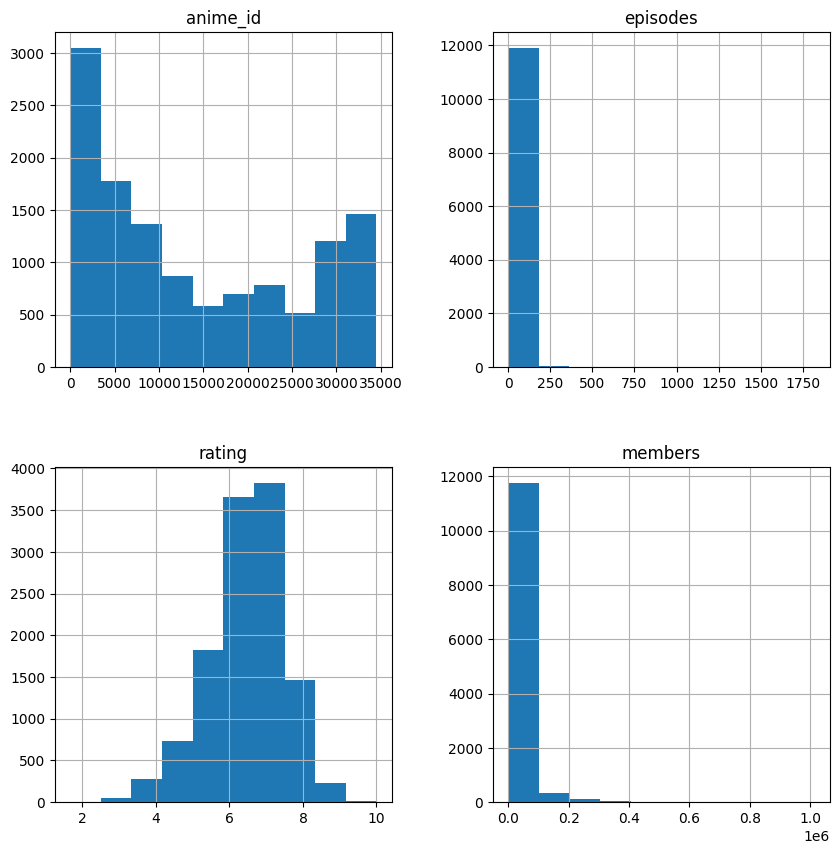

In [ ]:
#normal distribution
df.select_dtypes(include=['number']).hist(figsize=(10,10))
plt.show()

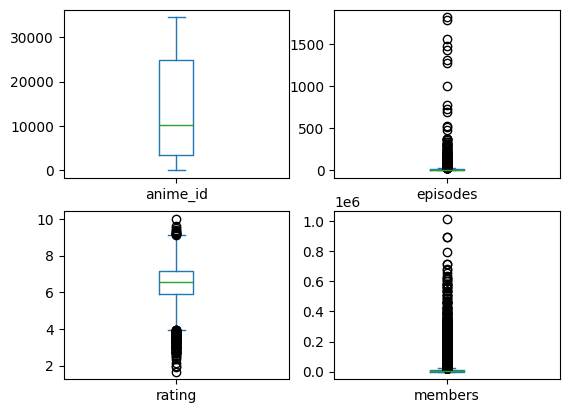

In [ ]:
#long tailed distribution
df.select_dtypes(include=['number']).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

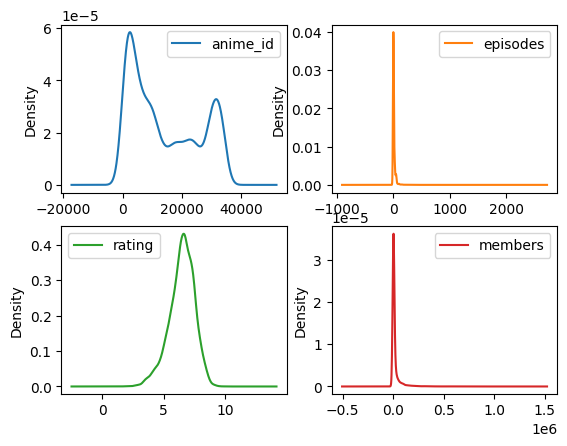

In [ ]:
#student t-distribution
df.select_dtypes(include=['number']).plot(kind='kde', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

In [ ]:
#bionmial distribution
import scipy.stats
scipy.stats.binom.rvs(n=10, p=0.5, size=1000)

array([7, 5, 2, 6, 5, 7, 6, 4, 5, 4, 5, 8, 5, 6, 6, 7, 3, 4, 3, 4, 7, 5,
       4, 4, 8, 8, 4, 6, 4, 8, 2, 7, 5, 6, 7, 5, 5, 3, 4, 7, 6, 6, 4, 7,
       4, 7, 5, 3, 6, 5, 3, 4, 8, 6, 6, 3, 5, 3, 3, 5, 4, 6, 4, 4, 8, 7,
       5, 6, 4, 2, 5, 5, 8, 6, 4, 4, 5, 6, 5, 6, 6, 4, 6, 3, 4, 3, 4, 5,
       5, 3, 4, 8, 8, 4, 5, 6, 6, 7, 8, 8, 4, 5, 9, 5, 5, 5, 3, 6, 6, 7,
       4, 4, 5, 7, 3, 8, 5, 7, 2, 7, 7, 3, 5, 4, 3, 4, 4, 8, 4, 5, 6, 6,
       6, 4, 7, 3, 4, 7, 8, 7, 5, 5, 2, 3, 4, 5, 5, 5, 6, 3, 6, 4, 3, 7,
       6, 2, 3, 7, 6, 6, 8, 6, 4, 5, 5, 7, 3, 6, 4, 5, 3, 2, 5, 4, 4, 6,
       3, 6, 5, 4, 9, 2, 3, 5, 4, 3, 2, 3, 6, 3, 5, 7, 5, 5, 2, 6, 6, 5,
       2, 5, 8, 7, 3, 5, 5, 6, 5, 5, 3, 5, 6, 3, 3, 4, 4, 7, 8, 5, 2, 6,
       6, 6, 5, 4, 5, 3, 6, 2, 1, 3, 5, 4, 3, 5, 7, 8, 3, 6, 4, 5, 6, 5,
       5, 3, 4, 3, 7, 5, 8, 4, 5, 6, 1, 5, 5, 3, 7, 8, 5, 4, 7, 3, 4, 6,
       4, 5, 5, 4, 5, 5, 6, 3, 6, 2, 5, 5, 4, 6, 4, 6, 5, 4, 6, 7, 3, 7,
       7, 6, 5, 6, 5, 5, 5, 4, 5, 4, 5, 5, 5, 5, 5,

In [ ]:
#chi-square distribution
scipy.stats.chi2.rvs(df=1, size=1000)

array([4.41149415e-02, 8.07881302e-01, 4.73866349e-01, 8.72438222e-02,
       2.92431540e+00, 3.67898092e-01, 1.27714099e-01, 1.09384995e-01,
       5.24378292e+00, 1.97898501e-01, 5.37244744e-03, 1.63879704e-02,
       1.50663625e+00, 1.50620613e-01, 7.11352112e-01, 9.64228566e-02,
       2.27616529e-01, 2.40614262e-01, 7.26649387e-01, 1.80991298e-01,
       3.14810655e-02, 1.61088026e-01, 1.00062578e-02, 1.55201265e-01,
       2.72154931e-01, 3.48375261e-01, 1.61657712e-01, 2.33693875e+00,
       2.40029106e-01, 1.19956290e-01, 8.12024556e+00, 1.12295915e+00,
       5.06851172e+00, 3.20359832e+00, 7.24590855e-01, 6.17421564e-02,
       8.08051774e-01, 1.07976154e-01, 4.49234909e-01, 6.97329383e-01,
       6.53694581e-02, 9.33596243e-02, 1.48545593e+00, 3.52834081e+00,
       2.85875807e-02, 1.85871575e-06, 4.06759040e+00, 6.01246140e-01,
       4.17821400e-02, 2.01130669e-01, 6.65500410e-01, 1.70835934e-01,
       2.03181265e+00, 1.11167288e-01, 1.76455812e+00, 2.66265602e+00,
      

In [ ]:
df.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [ ]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes    340
rating      230
members       0
dtype: int64

In [ ]:
#fill the missing value using mean or mode of that column
df['rating'].fillna(df['rating'].mean(), inplace=True)
df['type'].fillna(df['type'].mode()[0], inplace=True)
df['episodes'].fillna(df['episodes'].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

anime_id     0
name         0
genre       62
type         0
episodes     0
rating       0
members      0
dtype: int64

In [ ]:
selected_features=['anime_id', 'rating', 'type', 'episodes']
df[selected_features]

anime_id  rating   type  episodes
0         32281    9.37  Movie       1.0
1          5114    9.26     TV      64.0
2         28977    9.25     TV      51.0
3          9253    9.17     TV      24.0
4          9969    9.16     TV      51.0
...         ...     ...    ...       ...
12289      9316    4.15    OVA       1.0
12290      5543    4.28    OVA       1.0
12291      5621    4.88    OVA       4.0
12292      6133    4.98    OVA       1.0
12293     26081    5.46  Movie       1.0

[12294 rows x 4 columns]

In [ ]:
combined_features = df['name'] + ' ' + df['genre']+' '+df['type']
combined_features

0        Kimi no Na wa. Drama, Romance, School, Superna...
1        Fullmetal Alchemist: Brotherhood Action, Adven...
2        Gintama° Action, Comedy, Historical, Parody, S...
3                          Steins;Gate Sci-Fi, Thriller TV
4        Gintama&#039; Action, Comedy, Historical, Paro...
                               ...                        
12289    Toushindai My Lover: Minami tai Mecha-Minami H...
12290                               Under World Hentai OVA
12291            Violence Gekiga David no Hoshi Hentai OVA
12292    Violence Gekiga Shin David no Hoshi: Inma Dens...
12293        Yasuji no Pornorama: Yacchimae!! Hentai Movie
Length: 12294, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()


In [ ]:
# Replace NaN values with empty strings
combined_features = df['name'].fillna('') + ' ' + df['genre'].fillna('') + ' ' + df['type'].fillna('')

# Now you can proceed with vectorization
feature_vectors = vectorizer.fit_transform(combined_features)
print(feature_vectors)

  (0, 7052)	0.2153865705811725
  (0, 10286)	0.283528096839026
  (0, 9230)	0.2693369646930725
  (0, 8877)	0.2551674128629534
  (0, 2454)	0.2272779065505823
  (0, 11410)	0.388228413282953
  (0, 7158)	0.4550925136134089
  (0, 7534)	0.19620630762634764
  (0, 5466)	0.5362694990332014
  (1, 11112)	0.12857235222456834
  (1, 9797)	0.172280263721211
  (1, 6777)	0.2588878539236986
  (1, 6319)	0.2225516116878708
  (1, 2810)	0.15857970891118642
  (1, 263)	0.1575372207562887
  (1, 241)	0.14631654238462669
  (1, 1201)	0.5232329199323216
  (1, 400)	0.48205471843282277
  (1, 3003)	0.48205471843282277
  (1, 2454)	0.16533692266563005
  (2, 2844)	0.22151944869308507
  (2, 9233)	0.22151944869308507
  (2, 9117)	0.423992639108767
  (2, 8153)	0.3507174411365573
  (2, 4062)	0.2965866310512251
  :	:
  (12290, 11595)	0.5579079220837376
  (12290, 8046)	0.2062718853151471
  (12291, 2115)	0.5258061559122676
  (12291, 11370)	0.5021981138538678
  (12291, 3221)	0.5128137128163226
  (12291, 3935)	0.19648831849139634
 

In [ ]:
#cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
similarity=cosine_similarity(feature_vectors)
print(similarity)

[[1.         0.03757743 0.         ... 0.02744752 0.02263939 0.05925193]
 [0.03757743 1.         0.0906605  ... 0.         0.         0.        ]
 [0.         0.0906605  1.         ... 0.         0.         0.        ]
 ...
 [0.02744752 0.         0.         ... 1.         0.82482458 0.05695478]
 [0.02263939 0.         0.         ... 0.82482458 1.         0.0469777 ]
 [0.05925193 0.         0.         ... 0.05695478 0.0469777  1.        ]]


In [ ]:
print(similarity.shape)

(12294, 12294)


In [ ]:
#creat dendogram
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
import numpy as np # Import numpy

df_norm = df_norm.fillna(0) # Replace NaN values with 0
z=linkage(df_norm, method='complete', metric='euclidean')
z

array([[5.71100000e+03, 5.91800000e+03, 1.00179838e+00, 2.00000000e+00],
       [1.03540000e+04, 1.03760000e+04, 1.00244701e+00, 2.00000000e+00],
       [8.66300000e+03, 8.66500000e+03, 1.00244701e+00, 2.00000000e+00],
       ...,
       [2.45800000e+04, 2.45830000e+04, 4.82814093e+05, 1.56000000e+02],
       [2.45820000e+04, 2.45840000e+04, 7.18336133e+05, 1.22900000e+04],
       [2.45810000e+04, 2.45850000e+04, 1.01444863e+06, 1.22940000e+04]])

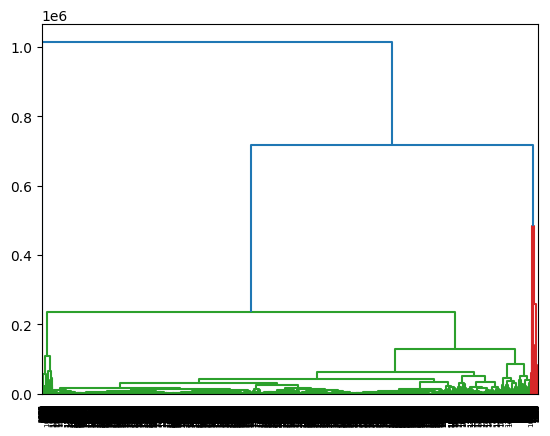

In [ ]:
dendrogram=sch.dendrogram(z)
plt.show()

In [ ]:
#creat cluster
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
h_complete=hc.fit(df_norm)
h_complete

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=5)

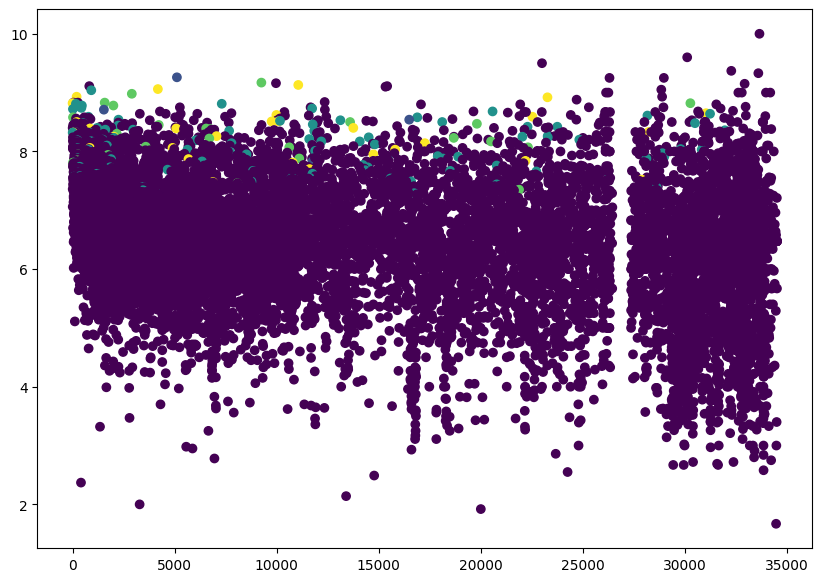

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(df_norm['anime_id'], df_norm['rating'], c=h_complete.labels_)

In [ ]:
df_norm['h_clusterid']=h_complete.labels_
df_norm

anime_id  episodes  rating  members  h_clusterid
0         32281       1.0    9.37   200630            0
1          5114      64.0    9.26   793665            1
2         28977      51.0    9.25   114262            0
3          9253      24.0    9.17   673572            3
4          9969      51.0    9.16   151266            0
...         ...       ...     ...      ...          ...
12289      9316       1.0    4.15      211            0
12290      5543       1.0    4.28      183            0
12291      5621       4.0    4.88      219            0
12292      6133       1.0    4.98      175            0
12293     26081       1.0    5.46      142            0

[12294 rows x 5 columns]

In [ ]:
df_norm.groupby('h_clusterid').std()

In [ ]:
#cluster
df_norm.groupby('h_clusterid').mean()


NameError: name 'norm_func' is not defined

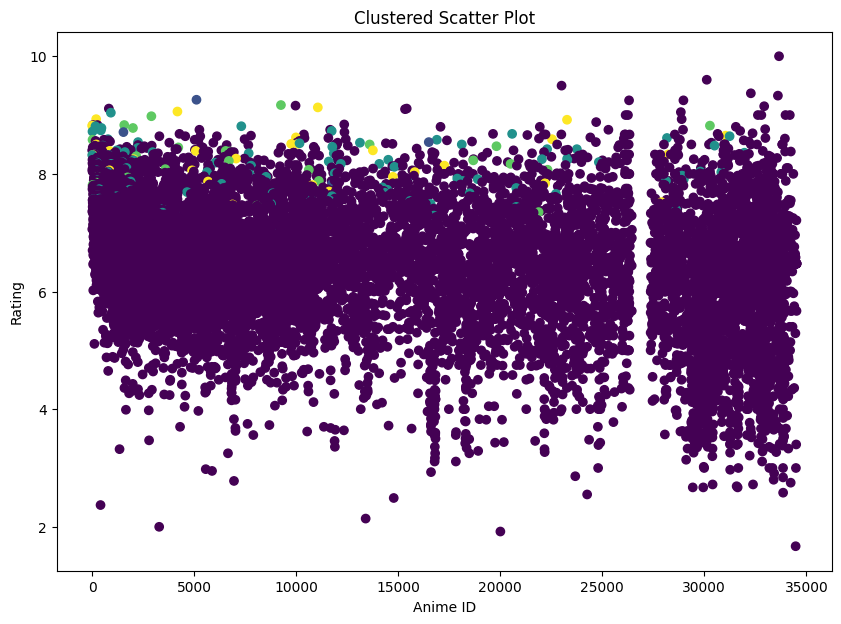

In [ ]:
#plot cluster
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(df_norm['anime_id'], df_norm['rating'], c=h_complete.labels_)
plt.xlabel('Anime ID')
plt.ylabel('Rating')
plt.title('Clustered Scatter Plot')
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
#number of unique users in the dataset
df['anime_id'].nunique()


12294

In [ ]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

# Sample user-anime matrix (replace with your actual data)
user_anime_matrix = np.array([
    [5, 4, 0, 1],
    [4, 5, 3, 0],
    [0, 3, 5, 4],
    [1, 0, 4, 5],
])

# Calculate cosine similarity between users
user_based_collab = 1 - pairwise_distances(user_anime_matrix, metric="cosine")
user_based_collab

array([[1.        , 0.87287156, 0.34914862, 0.23809524],
       [0.87287156, 1.        , 0.6       , 0.34914862],
       [0.34914862, 0.6       , 1.        , 0.87287156],
       [0.23809524, 0.34914862, 0.87287156, 1.        ]])

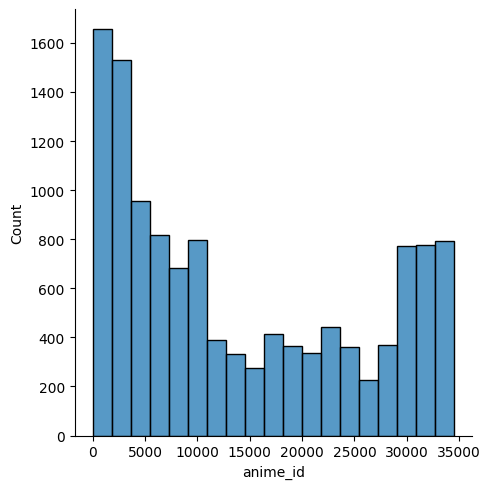

In [ ]:
sns.displot(df['anime_id'])

<ipython-input-95-904f97e7a7d6>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='anime_id', ylabel='Density'>

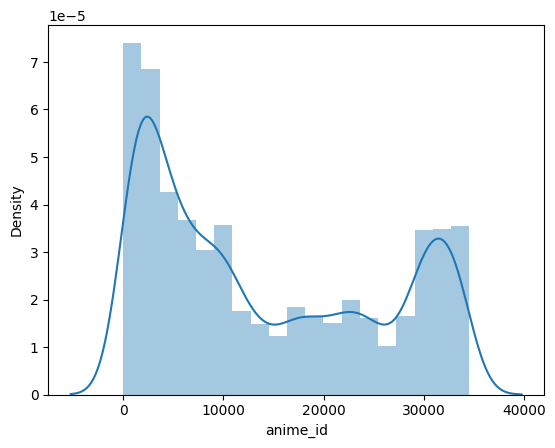

In [ ]:
sns.distplot(df['anime_id'])

In [ ]:
#feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()



In [ ]:
selected_features=['anime_id', 'rating', 'type', 'episodes']
df[selected_features]

anime_id  rating   type  episodes
0         32281    9.37  Movie       1.0
1          5114    9.26     TV      64.0
2         28977    9.25     TV      51.0
3          9253    9.17     TV      24.0
4          9969    9.16     TV      51.0
...         ...     ...    ...       ...
12289      9316    4.15    OVA       1.0
12290      5543    4.28    OVA       1.0
12291      5621    4.88    OVA       4.0
12292      6133    4.98    OVA       1.0
12293     26081    5.46  Movie       1.0

[12294 rows x 4 columns]

In [ ]:
#combained the feature
combined_features=df['name']+' '+df['genre']+' '+df['type']
combined_features

0        Kimi no Na wa. Drama, Romance, School, Superna...
1        Fullmetal Alchemist: Brotherhood Action, Adven...
2        Gintama° Action, Comedy, Historical, Parody, S...
3                          Steins;Gate Sci-Fi, Thriller TV
4        Gintama&#039; Action, Comedy, Historical, Paro...
                               ...                        
12289    Toushindai My Lover: Minami tai Mecha-Minami H...
12290                               Under World Hentai OVA
12291            Violence Gekiga David no Hoshi Hentai OVA
12292    Violence Gekiga Shin David no Hoshi: Inma Dens...
12293        Yasuji no Pornorama: Yacchimae!! Hentai Movie
Length: 12294, dtype: object

In [ ]:
combined_features = combined_features.dropna()


In [ ]:
combined_features

0        Kimi no Na wa. Drama, Romance, School, Superna...
1        Fullmetal Alchemist: Brotherhood Action, Adven...
2        Gintama° Action, Comedy, Historical, Parody, S...
3                          Steins;Gate Sci-Fi, Thriller TV
4        Gintama&#039; Action, Comedy, Historical, Paro...
                               ...                        
12289    Toushindai My Lover: Minami tai Mecha-Minami H...
12290                               Under World Hentai OVA
12291            Violence Gekiga David no Hoshi Hentai OVA
12292    Violence Gekiga Shin David no Hoshi: Inma Dens...
12293        Yasuji no Pornorama: Yacchimae!! Hentai Movie
Length: 12232, dtype: object

In [ ]:
vectorizer=TfidfVectorizer()
feature_vectors=vectorizer.fit_transform(combined_features)
print(feature_vectors)

  (0, 7026)	0.2165945236275296
  (0, 10249)	0.28334229141295586
  (0, 9199)	0.2691397787942248
  (0, 8846)	0.25495886379750177
  (0, 2443)	0.22704699170316892
  (0, 11370)	0.388126571496206
  (0, 7132)	0.45504429299414734
  (0, 7506)	0.1962211916296161
  (0, 5446)	0.5362863776930693
  (1, 11074)	0.1285816075341983
  (1, 9761)	0.17212453385599596
  (1, 6754)	0.2588049447005809
  (1, 6297)	0.22243815054101485
  (1, 2799)	0.15843813752038655
  (1, 261)	0.1573690947736818
  (1, 240)	0.14613898192864536
  (1, 1197)	0.5233722750326537
  (1, 398)	0.482159450435265
  (1, 2990)	0.482159450435265
  (1, 2443)	0.16517535476066833
  (2, 2833)	0.22136271412474182
  (2, 9202)	0.22136271412474182
  (2, 9086)	0.42406110116234913
  (2, 8123)	0.3507044043654289
  (2, 4046)	0.29651338840519414
  :	:
  (12228, 11554)	0.5579094562991438
  (12228, 8016)	0.20601436572697815
  (12229, 2104)	0.5258639916641799
  (12229, 11331)	0.5022401279579538
  (12229, 3208)	0.5128628412871075
  (12229, 3919)	0.1963254518727

In [ ]:
#cosine similarty
from sklearn.metrics.pairwise import cosine_similarity
similarity=cosine_similarity(feature_vectors)
print(similarity)

[[1.         0.03750257 0.         ... 0.02744807 0.02264026 0.05959864]
 [0.03750257 1.         0.09054671 ... 0.         0.         0.        ]
 [0.         0.09054671 1.         ... 0.         0.         0.        ]
 ...
 [0.02744807 0.         0.         ... 1.         0.8248399  0.0568769 ]
 [0.02264026 0.         0.         ... 0.8248399  1.         0.04691434]
 [0.05959864 0.         0.         ... 0.0568769  0.04691434 1.        ]]


In [ ]:
#Anime recommandation system
#user input
anime_name=input('Enter your favourite anime name:')


Enter your favourite anime name:Kimi no Na wa


In [ ]:
#All anime name
list_of_all_anime=df['name'].tolist()
print(list_of_all_anime)


['Kimi no Na wa.', 'Fullmetal Alchemist: Brotherhood', 'Gintama°', 'Steins;Gate', 'Gintama&#039;', 'Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou', 'Hunter x Hunter (2011)', 'Ginga Eiyuu Densetsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama&#039;: Enchousen', 'Clannad: After Story', 'Koe no Katachi', 'Gintama', 'Code Geass: Hangyaku no Lelouch R2', 'Haikyuu!! Second Season', 'Sen to Chihiro no Kamikakushi', 'Shigatsu wa Kimi no Uso', 'Mushishi Zoku Shou 2nd Season', 'Ookami Kodomo no Ame to Yuki', 'Code Geass: Hangyaku no Lelouch', 'Hajime no Ippo', 'Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen', 'Cowboy Bebop', 'One Punch Man', 'Mononoke Hime', 'Suzumiya Haruhi no Shoushitsu', 'Monogatari Series: Second Season', 'Mushishi Zoku Shou', 'Mushishi', 'Tengen Toppa Gurren Lagann', 'Great Teacher Onizuka', 'Natsume Yuujinchou Go', 'Hajime no Ippo: New Challenger', 'Mushishi Zoku Shou: Suzu no Shizuku', 'Natsume Yuujinchou Shi', 'Howl no Ugoku Shiro',

In [ ]:
import difflib # import the difflib module

#Anime recommandation system
#user input
anime_name=input('Enter your favourite anime name:')

find_close_match=difflib.get_close_matches(anime_name, list_of_all_anime)
print(find_close_match)

Enter your favourite anime name:Kimi no Na wa
['Kimi no Na wa.', 'Kimi no Na wo Yobeba', 'Kimi no Iru Machi']


In [ ]:
#finding index of the anime
close_match=find_close_match[0]
index_of_the_anime=df[df.name==close_match]['anime_id'].values[0]
print(index_of_the_anime)

32281


In [ ]:
#getting a list of smiliar movies
#finding index of the anime
close_match = find_close_match[0]
index_of_the_anime = df[df.name==close_match]['anime_id'].values[0]



In [ ]:
# Find the internal ID for this anime
internal_id = df[df['anime_id'] == index_of_the_anime].index[0]
internal_id

0

In [ ]:
# Use the internal ID to index into the similarity matrix
similarity_score = list(enumerate(similarity[internal_id]))
similarity_score


[(0, 1.0000000000000002),
 (1, 0.03750256740191345),
 (2, 0.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.06202671722692723),
 (6, 0.0),
 (7, 0.04544349632539186),
 (8, 0.04923926681851058),
 (9, 0.0),
 (10, 0.15024283197673333),
 (11, 0.1836224239851011),
 (12, 0.0),
 (13, 0.05448036760944854),
 (14, 0.1074693417168874),
 (15, 0.15235741328377705),
 (16, 0.4748650504824826),
 (17, 0.05242653246075633),
 (18, 0.06083221826351528),
 (19, 0.07419790129827804),
 (20, 0.08106474552640269),
 (21, 0.06000100286582542),
 (22, 0.042572812500600916),
 (23, 0.06010119824774924),
 (24, 0.04777485144549327),
 (25, 0.20774430645866077),
 (26, 0.11651927047768285),
 (27, 0.057875319438434554),
 (28, 0.07273554552537143),
 (29, 0.0),
 (30, 0.08933993612897315),
 (31, 0.10130391583015574),
 (32, 0.06140523023028627),
 (33, 0.09564550895797734),
 (34, 0.09772276825274831),
 (35, 0.14720226692368538),
 (36, 0.06638722936096637),
 (37, 0.09121465434478215),
 (38, 0.043728129077089804),
 (39, 0.10401000478611505),
 (4

In [ ]:
#sorting the anime
sorted_similar_anime=sorted(similarity_score, key=lambda x:x[1], reverse=True)
print(sorted_similar_anime)

[(0, 1.0000000000000002), (11402, 0.4923385904693973), (16, 0.4748650504824826), (404, 0.44036320850419647), (764, 0.44036320850419647), (7211, 0.39623491390466403), (1131, 0.3959816639832701), (4839, 0.38947411644218594), (4808, 0.37615320209070946), (2844, 0.37400063954104423), (2750, 0.370171949024304), (319, 0.35849809795545706), (2611, 0.35664811144981595), (2299, 0.3352130960057408), (8223, 0.3325236574199757), (5591, 0.33246144370045727), (2191, 0.330200142199561), (11255, 0.3273486273058902), (2077, 0.3234448621975141), (1959, 0.3222668276804875), (7557, 0.3188646289426036), (338, 0.314505001041001), (1900, 0.3100315416235284), (76, 0.30954710856706547), (843, 0.3069984825108798), (4204, 0.3065654414052982), (10656, 0.30540696205265544), (4556, 0.30266836684819826), (2103, 0.29479007452467065), (158, 0.2906709897837562), (11972, 0.2848254692965485), (4060, 0.2842716301822692), (2637, 0.28362341597011), (5925, 0.28358210818722485), (6866, 0.2829735031129581), (1046, 0.2805330051

In [ ]:
print('Anime suggested for you:\n')
i = 1
for anime in sorted_similar_anime:
  index = anime[0]
  name_from_index = df[df.index==index]['name'].values[0]
  if (i<30):
    print(i, '.',name_from_index)
    i+=1

Anime suggested for you:

1 . Kimi no Na wa.
2 . Tsuma to Mama to Boin
3 . Shigatsu wa Kimi no Uso
4 . Kimi to Boku. 2
5 . Kimi to Boku.
6 . Pair
7 . Bleach Movie 3: Fade to Black - Kimi no Na wo Yobu
8 . K-On!!: Ura-On!!
9 . Konjiki no Gash Bell!!: Ougon no Chichi wo Motsu Otoko
10 . IS: Infinite Stratos 2 - Infinite Wedding
11 . Kimi no Iru Machi
12 . Kimi ni Todoke
13 . Kimi no Iru Machi OVA
14 . Kimi to Boku
15 . Big X
16 . Kenritsu Chikyuu Boueigun
17 . Kimi no Iru Machi: Tasogare Kousaten
18 . Pandra The Animation: Shiroki Yokubou Kuro no Kibou
19 . Kimi no Kokoro wa Kagayaiteru kai?
20 . Air Movie
21 . Sougiya to Inu
22 . Kimi ni Todoke 2nd Season
23 . Kimi ga Nozomu Eien
24 . JoJo no Kimyou na Bouken: Diamond wa Kudakenai
25 . Shigatsu wa Kimi no Uso: Moments
26 . Kouchuu Ouja Mushiking: Mori no Tami no Densetsu
27 . Ultra Nyan: Hoshizora kara Maiorita Fushigi Neko
28 . Jumping
29 . Clannad Movie


In [ ]:
#split the data into train and test
from sklearn.model_selection import train_test_split
x=df.drop(columns='anime_id', axis=1)
y=df['anime_id']
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=2)
print(x.shape, x_train.shape, x_test.shape)


(12294, 378) (9835, 378) (2459, 378)


In [ ]:
x.head()

name  \
0                    Kimi no Na wa.   
1  Fullmetal Alchemist: Brotherhood   
2                          Gintama°   
3                       Steins;Gate   
4                     Gintama&#039;   

                                               genre   type  episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie         1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV        64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV        51    9.25   
3                                   Sci-Fi, Thriller     TV        24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV        51    9.16   

   members    0    1    2    3  ...  176  177  178  179  180  181  182  183  \
0   200630  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1   793665  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2   114262  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3   673572  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4   151266  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   184  185  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  

[5 rows x 378 columns]

In [ ]:
y=df['anime_id']
y.head()

0    32281
1     5114
2    28977
3     9253
4     9969
Name: anime_id, dtype: int64

In [ ]:
y=df['episodes']
y

0         1
1        64
2        51
3        24
4        51
         ..
12289     1
12290     1
12291     4
12292     1
12293     1
Name: episodes, Length: 12294, dtype: int64

In [223]:
#model trainig
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=2)
print(x.shape, x_train.shape, x_test.shape)


(12294, 378) (9835, 378) (2459, 378)


In [224]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=2)
print(x.shape, x_train.shape, x_test.shape)

(12294, 378) (9835, 378) (2459, 378)


In [227]:
x.columns = x.columns.astype(str)
x.head()


name  \
0                    Kimi no Na wa.   
1  Fullmetal Alchemist: Brotherhood   
2                          Gintama°   
3                       Steins;Gate   
4                     Gintama&#039;   

                                               genre   type  episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie         1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV        64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV        51    9.25   
3                                   Sci-Fi, Thriller     TV        24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV        51    9.16   

   members    0    1    2    3  ...  176  177  178  179  180  181  182  183  \
0   200630  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1   793665  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2   114262  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3   673572  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4   151266  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   184  185  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  

[5 rows x 378 columns]

In [229]:
#model training
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Convert column names to strings
x.columns = x.columns.astype(str)

# Identify columns with string values (object dtype)
categorical_cols = x.select_dtypes(include=['object']).columns

# Apply Label Encoding to convert string columns to numerical
label_encoder = LabelEncoder()
for col in categorical_cols:
    x[col] = label_encoder.fit_transform(x[col])

# Split data into training and testing sets
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=2)
print(x.shape, x_train.shape, x_test.shape)

# Create and train the model
model=LogisticRegression()
model.fit(x_train, y_train)

(12294, 378) (9835, 378) (2459, 378)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [231]:
pred=model.predict(x_test)
pred

array([12,  1,  1, ...,  1,  1,  1])

In [232]:
#classification
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.4766165107767385

In [233]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[1137,    0,    3, ...,    0,    0,    0],
       [ 221,    0,    1, ...,    0,    0,    0],
       [ 107,    0,    1, ...,    0,    0,    0],
       ...,
       [   1,    0,    0, ...,    0,    0,    0],
       [   1,    0,    0, ...,    0,    0,    0],
       [   1,    0,    0, ...,    0,    0,    0]])

In [234]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.50      0.96      0.66      1181
           2       0.00      0.00      0.00       226
           3       0.14      0.01      0.02       110
           4       0.00      0.00      0.00        61
           5       0.00      0.00      0.00        26
           6       0.00      0.00      0.00        55
           7       0.00      0.00      0.00        17
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00        10
          10       0.00      0.00      0.00        22
          11       0.00      0.00      0.00        14
          12       0.22      0.20      0.21       166
          13       0.00      0.00      0.00       102
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         5
          18       0.00      0.00      0.00         2
          19       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [237]:
print('Accuracy:', model.score(x_test, y_test))

Accuracy: 0.4766165107767385


In [239]:
score=cross_val_score(model, x, y, cv=5)
score

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the d

array([0.36966246, 0.48718991, 0.48881659, 0.49613664, 0.46745321])

In [240]:
print('Accuracy:', model.score(x_test, y_test))

Accuracy: 0.4766165107767385


In [241]:
print("Score:",score)
print("Mean Score:",score.mean())
print("Standard Deviation:",score.std())
print("Min Score:",score.min())
print("Max Score:",score.max())
print("25th Percentile:",np.percentile(score, 25))
print("50th Percentile:",np.percentile(score, 50))
print("75th Percentile:",np.percentile(score, 75))
print("90th Percentile:",np.percentile(score, 90))
print("95th Percentile:",np.percentile(score, 95))
print("99th Percentile:",np.percentile(score, 99))
print("99.9th Percentile:",np.percentile(score, 99.9))
print("CV score:",np.mean(score))

Score: [0.36966246 0.48718991 0.48881659 0.49613664 0.46745321]
Mean Score: 0.4618517652065063
Standard Deviation: 0.04706340364952322
Min Score: 0.36966246441642947
Max Score: 0.4961366409109394
25th Percentile: 0.46745321399511797
50th Percentile: 0.4871899145994307
75th Percentile: 0.48881659211061407
90th Percentile: 0.4932086213908093
95th Percentile: 0.49467263115087434
99th Percentile: 0.49584383895892636
99.9th Percentile: 0.4961073607157381
CV score: 0.4618517652065063


In [ ]:
.#Can you explain the difference between user-based and item-based collaborative filtering?
#User-based collaborative filtering recommends items to a user based on the preferences of similar users.
#It identifies users with similar tastes and recommends items that they have liked or interacted with.
#On the other hand, item-based collaborative filtering recommends items that are similar to the ones a user has already liked or interacted with. It identifies items with similar attributes or features and recommends them to the user.



In [ ]:
# What is collaborative filtering, and how does it work?
##Collaborative filtering is a technique used in recommendation systems to predict user preferences based on the behavior or preferences of other users. It works by building a model from the interactions between users and items, such as ratings, clicks, or purchases. The model identifies patterns and relationships between users and items, and uses these patterns to make recommendations.
#There are two types of collaborative filtering: user-based and item-based, as explained above.

